In [5]:
import numpy as np

path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_09/1691486_right_hole_caffine_15_31/videos/Camera3/frametimes.npy'

wheee = np.load(path)

wheee[1][-1]

1200.5890812959988

In [35]:
import glob
import numpy as np

def calculate_total_recording_time(base_folders):
    total_time = 0  # Initialize total time in seconds

    # Build a glob pattern to find all frametimes.npy files in the desired folder structure
    patterns = [f"{base}/**/**/videos/Camera3/frametimes.npy" for base in base_folders]
    # print(patterns)

    # Use glob to search for files matching the patterns
    for pattern in patterns:
        file_paths = glob.glob(pattern, recursive=False)

        # Filter out paths that belong to folders starting with "calib"
        valid_paths = [path for path in file_paths if "/calib" not in path]
        print(len(valid_paths))
        # print(valid_paths)

        # Sum the last timestamps from all valid frametimes.npy files
        try:
            tttttt = sum(np.load(path)[1][-1] for path in valid_paths)
            total_time += tttttt
            print(f'for 1 folder,{pattern}',tttttt/3600)
        except Exception as e:
            print(f"Error processing one of the files: {e}")

    # Convert total time from seconds to hours
    total_hours = total_time / 3600
    return total_hours

# Example usage
base_folders = [
    "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ",
    "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1"
]

total_hours = calculate_total_recording_time(base_folders)
print(f"Total recording time: {total_hours:.2f} hours")


105
for 1 folder,/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/**/**/videos/Camera3/frametimes.npy 31.283484191346663
92
for 1 folder,/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/**/**/videos/Camera3/frametimes.npy 20.49555236038
Total recording time: 51.78 hours


In [36]:
#folder with #, so folders with noticed dropped cam

import glob
import numpy as np

def calculate_total_recording_time(base_folders):
    total_time = 0  # Initialize total time in seconds

    # Build a glob pattern to find all frametimes.npy files in the desired folder structure
    patterns = [f"{base}/**/#**/videos/Camera3/frametimes.npy" for base in base_folders]
    # print(patterns)

    # Use glob to search for files matching the patterns
    for pattern in patterns:
        file_paths = glob.glob(pattern, recursive=False)

        # Filter out paths that belong to folders starting with "calib"
        valid_paths = [path for path in file_paths if "/calib" not in path]
        print(len(valid_paths))
        # print(valid_paths)

        # Sum the last timestamps from all valid frametimes.npy files
        try:
            tttttt = sum(np.load(path)[1][-1] for path in valid_paths)
            total_time += tttttt
            print(f'for 1 folder,{pattern}',tttttt/3600)
        except Exception as e:
            print(f"Error processing one of the files: {e}")

    # Convert total time from seconds to hours
    total_hours = total_time / 3600
    return total_hours

# Example usage
base_folders = [
    "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ",
    "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1"
]

total_hours = calculate_total_recording_time(base_folders)
print(f"Total recording time: {total_hours:.2f} hours")


4
for 1 folder,/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/**/#**/videos/Camera3/frametimes.npy 0.32969448978666643
16
for 1 folder,/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/**/#**/videos/Camera3/frametimes.npy 2.3926721862400004
Total recording time: 2.72 hours


In [37]:
import glob
import numpy as np
import os

def calculate_total_recording_time(base_folders, txt_files):
    total_time = 0  # Initialize total time in seconds

    # Build a glob pattern to find all frametimes.npy files in the desired folder structure
    patterns = [f"{base}/**/#**/videos/Camera3/frametimes.npy" for base in base_folders]

    # Use glob to search for files matching the patterns
    all_valid_paths = []
    for pattern in patterns:
        file_paths = glob.glob(pattern, recursive=False)

        # Filter out paths that belong to folders starting with "calib"
        valid_paths = [path for path in file_paths if "/calib" not in path]
        all_valid_paths.extend(valid_paths)

    # Read paths from .txt files and append "/videos/Camera3/frametimes.npy"
    for txt_file in txt_files:
        try:
            with open(txt_file, 'r') as file:
                lines = file.readlines()
                txt_paths = [os.path.join(line.strip(), "videos/Camera3/frametimes.npy") for line in lines]
                all_valid_paths.extend(txt_paths)
        except Exception as e:
            print(f"Error reading .txt file {txt_file}: {e}")

    # Sum the last timestamps from all valid frametimes.npy files
    try:
        for path in all_valid_paths:
            if os.path.exists(path):
                last_time = np.load(path)[1][-1]
                total_time += last_time
            else:
                print(f"Path does not exist: {path}")
    except Exception as e:
        print(f"Error processing one of the files: {e}")

    # Convert total time from seconds to hours
    total_hours = total_time / 3600
    return total_hours

# Example usage
base_folders = [
    "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ",
    "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1"
]

txt_files = [
    "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/mir_bundle_run/synced_folders/240914_failed_sum_test.txt",
    "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/sync_failed.txt"
]

total_hours = calculate_total_recording_time(base_folders, txt_files)
print(f"Total recording time: {total_hours:.2f} hours")


Path does not exist: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_08/1691486_no_hole_saline_1025/videos/Camera3/frametimes.npy
Path does not exist: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_caffeine_1050/videos/Camera3/frametimes.npy
Path does not exist: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/20240730_PMCr2/videos/Camera3/frametimes.npy
Path does not exist: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_10_07/20240916v1r1_19_18/videos/Camera3/frametimes.npy
Path does not exist: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_07/20240916v1r1_18_53/videos/Camera3/frametimes.npy
Total recording time: 11.32 hours


In [29]:
import pandas as pd

mini_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/20240717-PMC-r1/customEntValHere/2024_10_24/12_32_37/My_V4_Miniscope/timeStamps.csv'

df = pd.read_csv(mini_path)

# Display the first few rows
# print(df.head())
last_timestamp = df['Time Stamp (ms)'].iloc[-1]
last_timestamp

901565

In [34]:
import glob
import pandas as pd

def calculate_total_recording_time(base_folders):
    total_time = 0  # Initialize total time in seconds

    # Build a glob pattern to find all timestamps.csv files in the desired folder structure
    patterns = [f"{base}/**/**/**/**/My_V4_Miniscope/timeStamps.csv" for base in base_folders]

    # Use glob to search for files matching the patterns
    for pattern in patterns:
        file_paths = glob.glob(pattern, recursive=False)

        # Filter out paths that belong to folders starting with "calib"
        valid_paths = [path for path in file_paths if "/calib" not in path]
        print(f"Found {len(valid_paths)} valid timestamp files for pattern: {pattern}")

        # Sum the last timestamps from all valid timestamps.csv files
        for path in valid_paths:
            try:
                # Read the CSV file
                df = pd.read_csv(path)

                # Ensure the 'Time Stamp (ms)' column exists
                if 'Time Stamp (ms)' not in df.columns:
                    print(f"Missing 'Time Stamp (ms)' column in file: {path}")
                    continue

                # Get the last timestamp (in milliseconds) and convert to seconds
                last_timestamp_ms = df['Time Stamp (ms)'].iloc[-1]
                total_time += last_timestamp_ms  # Convert ms to seconds

                print(f"Processed file: {path}, Last Timestamp: {last_timestamp_ms} ms")

            except Exception as e:
                print(f"Error processing file {path}: {e}")

    # Convert total time from seconds to hours
    total_hours = total_time / 3600 / 1000 
    return total_hours

# Example usage
base_folders = [
    "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted"
]

total_hours = calculate_total_recording_time(base_folders)
print(f"Total recording time: {total_hours:.2f} hours")


Found 76 valid timestamp files for pattern: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/**/**/**/**/My_V4_Miniscope/timeStamps.csv
Processed file: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/20240910-V1-R/customEntValHere/2024_11_13/16_18_24/My_V4_Miniscope/timeStamps.csv, Last Timestamp: 901792 ms
Processed file: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/20240910-V1-R/customEntValHere/2024_11_01/12_52_48/My_V4_Miniscope/timeStamps.csv, Last Timestamp: 901711 ms
Processed file: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/20240910-V1-R/customEntValHere/2024_11_01/13_09_59/My_V4_Miniscope/timeStamps.csv, Last Timestamp: 901754 ms
Processed file: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/20240910-V1-R/customEntValHere/2024_11_01/11_39_00/My_V4_Miniscope/timeStamps.csv, Last Timestamp: 901281 ms
Processed file: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/20241001-PMC-r2/customEntValHere/2024_10_24

In [ ]:
#the analysi cannot isolated miniscope
import glob
import pandas as pd

def calculate_total_recording_time_from_file(list_file_path):
    total_time = 0  # Initialize total time in seconds

    # Read the base paths from the text file
    try:
        with open(list_file_path, 'r') as file:
            base_folders = [line.strip() for line in file if line.strip()]
    except Exception as e:
        print(f"Error reading the file list: {e}")
        return 0

    # Use glob to search for the timestamps.csv files in each base folder
    for base in base_folders:
        pattern = f"{base}/**/**/**/My_V4_Miniscope/timeStamps.csv"
        file_paths = glob.glob(pattern, recursive=False)

        # Process each timestamps.csv file
        for path in file_paths:
            try:
                # Read the CSV file
                df = pd.read_csv(path)

                # Ensure the 'Time Stamp (ms)' column exists
                if 'Time Stamp (ms)' not in df.columns:
                    print(f"Missing 'Time Stamp (ms)' column in file: {path}")
                    continue

                # Get the last timestamp (in milliseconds) and add to total time
                last_timestamp_ms = df['Time Stamp (ms)'].iloc[-1]
                total_time += last_timestamp_ms

                print(f"Processed file: {path}, Last Timestamp: {last_timestamp_ms} ms")

            except Exception as e:
                print(f"Error processing file {path}: {e}")

    # Convert total time from milliseconds to hours
    total_hours = total_time / 3600 / 1000
    return total_hours

# Example usage
list_file_path = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/mini_bad.txt"  # Text file containing base folder paths
total_hours = calculate_total_recording_time_from_file(list_file_path)
print(f"Total recording time: {total_hours:.2f} hours")


Processed file: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/202401015-PMC-r1/customEntValHere/2024_11_06/16_16_30/My_V4_Miniscope/timeStamps.csv, Last Timestamp: 901837 ms
Processed file: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/202401015-PMC-r1/customEntValHere/2024_11_06/15_37_17/My_V4_Miniscope/timeStamps.csv, Last Timestamp: 174021 ms
Processed file: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/202401015-PMC-r1/customEntValHere/2024_11_07/14_36_12/My_V4_Miniscope/timeStamps.csv, Last Timestamp: 901617 ms
Processed file: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/202401015-PMC-r1/customEntValHere/2024_11_07/14_53_09/My_V4_Miniscope/timeStamps.csv, Last Timestamp: 901703 ms
Processed file: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/20241001-PMC-r2/customEntValHere/2024_10_24/15_27_55/My_V4_Miniscope/timeStamps.csv, Last Timestamp: 901334 ms
Processed file: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1min

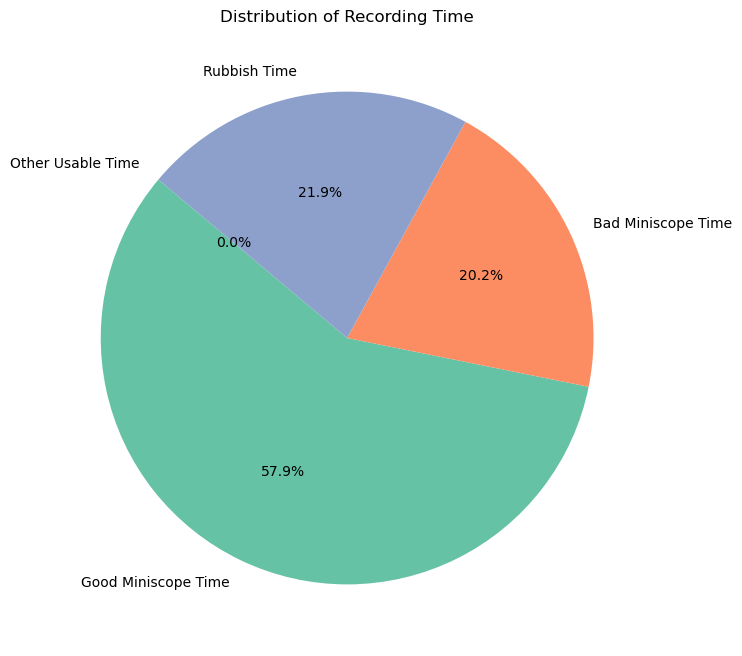

In [ ]:
# import matplotlib.pyplot as plt

# # Example data
# total_recording_time = 51.78  # hours
# rubbish_time = 11.32  # hours
# miniscope_time = 40.46  # hours (good + bad)
# good_miniscope_time = 30.00  # hours
# bad_miniscope_time = miniscope_time - good_miniscope_time  # Calculate bad time

# # Breakdown for the pie chart
# data = [good_miniscope_time, bad_miniscope_time, rubbish_time, total_recording_time - miniscope_time - rubbish_time]
# labels = ['Good Miniscope Time', 'Bad Miniscope Time', 'Rubbish Time', 'Other Usable Time']
# colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# # Pie Chart
# plt.figure(figsize=(8, 8))
# plt.pie(data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
# plt.title('Distribution of Recording Time')
# plt.show()


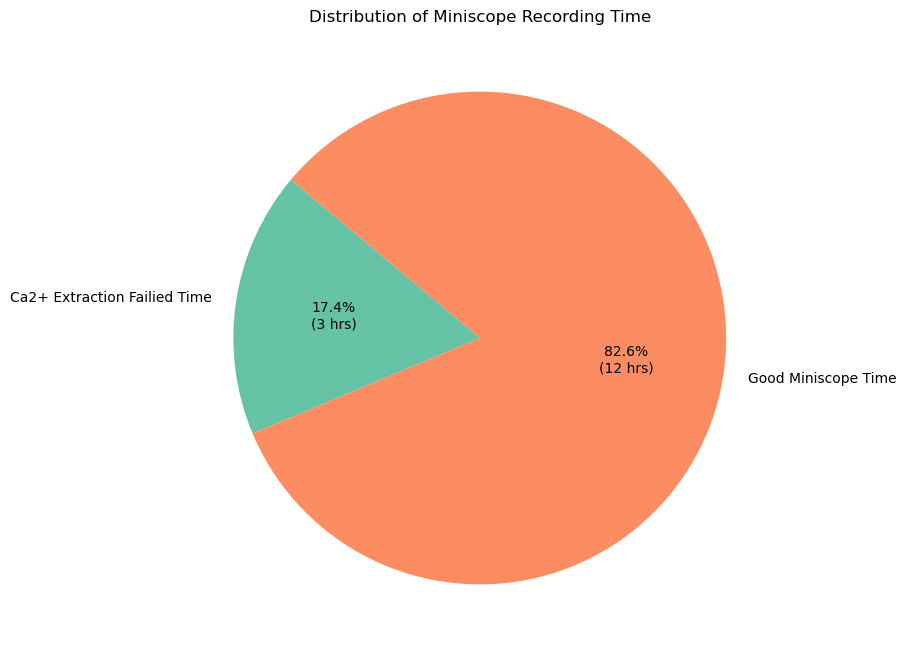

In [58]:
import matplotlib.pyplot as plt

# Example data for Miniscope Recording
total_miniscope_time = 14.9  # hours (good + bad)
good_miniscope_time = 2.6  # hours
bad_miniscope_time = total_miniscope_time - good_miniscope_time  # Calculate bad time

# Breakdown for Miniscope Recording
data_miniscope = [good_miniscope_time, bad_miniscope_time]
labels_miniscope = ['Ca2+ Extraction Failied Time', 'Good Miniscope Time']
colors_miniscope = ['#66c2a5', '#fc8d62']

# Function to format autopct
def format_autopct(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute} hrs)"

# Pie Chart for Miniscope Recording
plt.figure(figsize=(8, 8))
plt.pie(
    data_miniscope, 
    labels=labels_miniscope, 
    autopct=lambda pct: format_autopct(pct, data_miniscope), 
    colors=colors_miniscope, 
    startangle=140
)
plt.title('Distribution of Miniscope Recording Time')
plt.show()


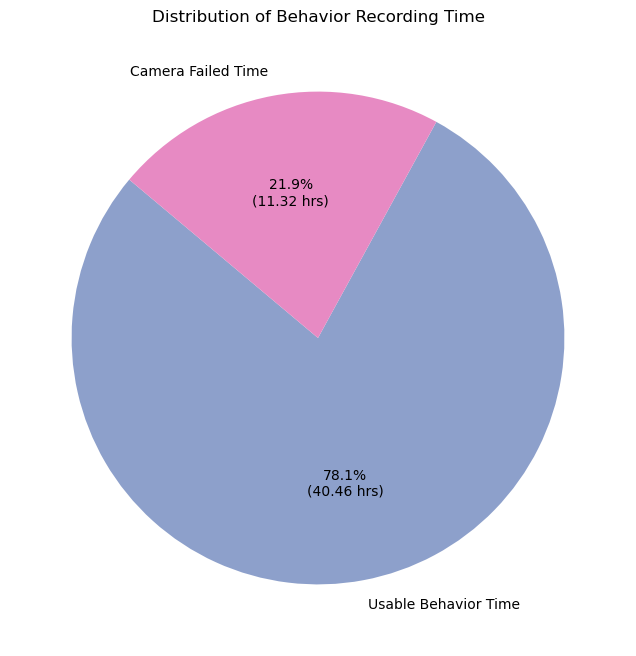

In [60]:
import matplotlib.pyplot as plt

# Example data for Behavior Recording
total_recording_time = 51.78  # hours
rubbish_time = 11.32  # hours
usable_behavior_time = total_recording_time - rubbish_time  # Calculate usable behavior time

# Breakdown for Behavior Recording
data_behavior = [usable_behavior_time, rubbish_time]
labels_behavior = ['Usable Behavior Time', 'Camera Failed Time']
colors_behavior = ['#8da0cb', '#e78ac3']

# Function to format autopct
def format_autopct_behavior(pct, all_vals):
    absolute = round(pct / 100. * sum(all_vals), 2)
    return f"{pct:.1f}%\n({absolute} hrs)"

# Pie Chart for Behavior Recording
plt.figure(figsize=(8, 8))
plt.pie(
    data_behavior, 
    labels=labels_behavior, 
    autopct=lambda pct: format_autopct_behavior(pct, data_behavior), 
    colors=colors_behavior, 
    startangle=140
)
plt.title('Distribution of Behavior Recording Time')
plt.show()


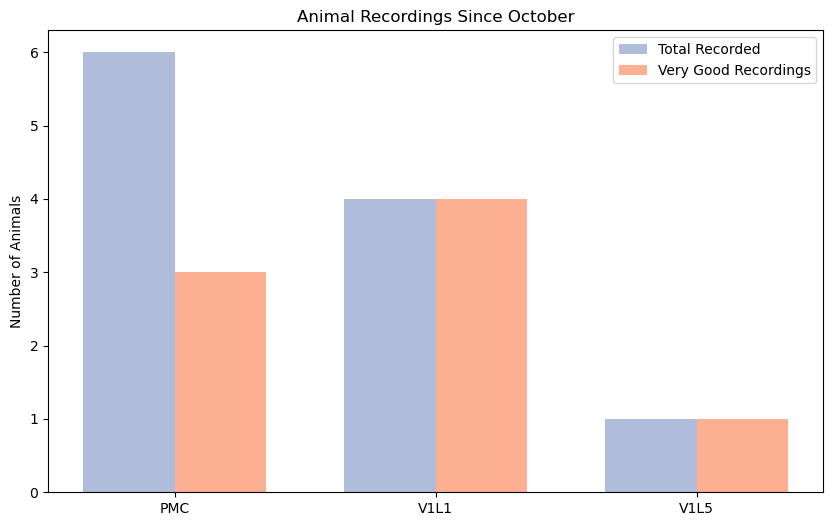

In [63]:
import matplotlib.pyplot as plt

# Data
categories = ['PMC', 'V1L1', 'V1L5']
total_recorded = [6, 4, 1]
very_good_recordings = [3, 4, 1]

# Bar chart setup
x = range(len(categories))
width = 0.35

plt.figure(figsize=(10, 6))

# Bar plots
plt.bar(x, total_recorded, width, label='Total Recorded', alpha=0.7, color='#8da0cb')
plt.bar([i + width for i in x], very_good_recordings, width, label='Very Good Recordings', alpha=0.7, color='#fc8d62')

# Customization
plt.xticks([i + width / 2 for i in x], categories)
plt.ylabel('Number of Animals')
plt.title('Animal Recordings Since October')
plt.legend()

plt.show()


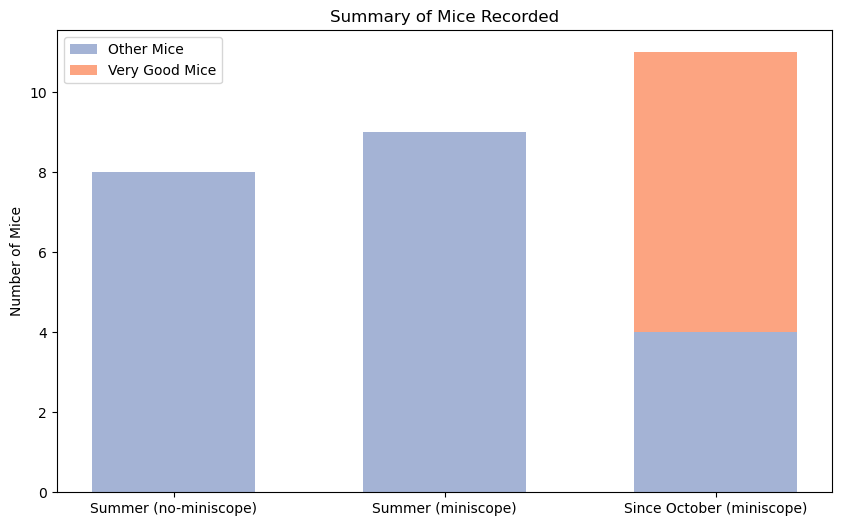

In [68]:
import matplotlib.pyplot as plt

# Data
categories = ['Summer (no-miniscope)', 'Summer (miniscope)', 'Since October (miniscope)']
very_good_mice = [0, 0, 7]
remaining_mice = [8, 9, 4]  # Total - Very Good

# Bar chart setup
x = range(len(categories))
width = 0.6

plt.figure(figsize=(10, 6))

# Stacked bar chart
plt.bar(x, remaining_mice, width, label='Other Mice', color='#8da0cb', alpha=0.8)
plt.bar(x, very_good_mice, width, bottom=remaining_mice, label='Very Good Mice', color='#fc8d62', alpha=0.8)

# Customization
plt.xticks(x, categories)
plt.ylabel('Number of Mice')
plt.title('Summary of Mice Recorded')
plt.legend()

plt.show()
